In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pyarrow as pa
import pyarrow.parquet as pq
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import functions as fc
import matplotlib.pyplot as plt

/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
samples = ["0_large.parquet","0_1_large.parquet","0_3_large.parquet","0_5_large.parquet","1_large.parquet","2_large.parquet","3_large.parquet","4_0_large.parquet","4_2_large.parquet","4_4_large.parquet","4_5_large.parquet","4_6_large.parquet","4_65_large.parquet",]

values = [0, 0.1, 0.3, 0.5, 1, 2, 3, 4, 4.2, 4.4, 4.5, 4.6, 4.65 ]


In [6]:
pfom_list = []
names = []
maximum = []
index=[]
clf = XGBClassifier()
clf.load_model(f"/ceph/aavocone/PFOM_models/new_4_6_model500.txt")

for signals in samples:

    df = pq.read_table(f"/ceph/aavocone/Datasets/{signals}")
    df = df.to_pandas()
    names.append(signals[:-13])
    X = df[df.columns[:-1]]    #exclude "signal efficiency [%]" "classification" "B_sig_isSignalAcceptMissingNeutrino"
    y = df["signal"]   
    xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
    xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5)

    yprob = clf.predict_proba(xtest)[:,1]
    sh,bh,s,b,bin_edges = fc.efficiency(yprob,ytest, eff_type=0)
    pfom = fc.PFOM(s,b,bh,5)
    max_index = np.where(pfom==max(pfom))[0][0] #np.where = tuple(array[index_value]), to get index you need to specify location in tuple and in array... 
    max_value = pfom[max_index]
    pfom_list.append(pfom)
    maximum.append(max_value)
    index.append(max_index)


    

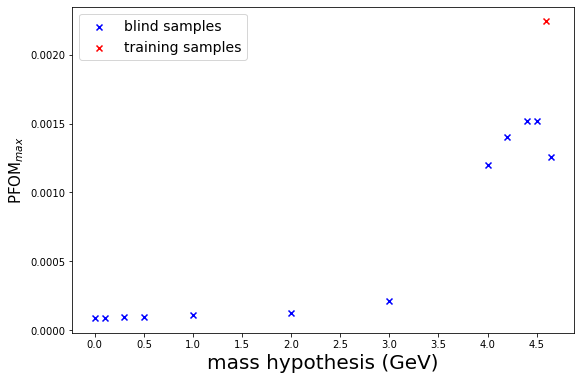

In [7]:
plt.figure(figsize=(9,6))
plt.scatter(values[:-2], maximum[:-2], color="b", marker = "x",label="blind samples")
plt.scatter(values[-2],maximum[-2],color="r",marker="x",label="training samples")
plt.scatter(values[12],maximum[12],color="b",marker="x")
plt.ylabel("PFOM$_{max}$",fontsize=15)
plt.xlabel("mass hypothesis (GeV)", fontsize = 20)
plt.xticks(np.arange(0,4.7,0.5))
plt.legend(fontsize=14)
plt.savefig(f"/work/aavocone/week14/pfom/pfom_max_46.pdf", format="pdf",bbox_inches="tight")
plt.show()

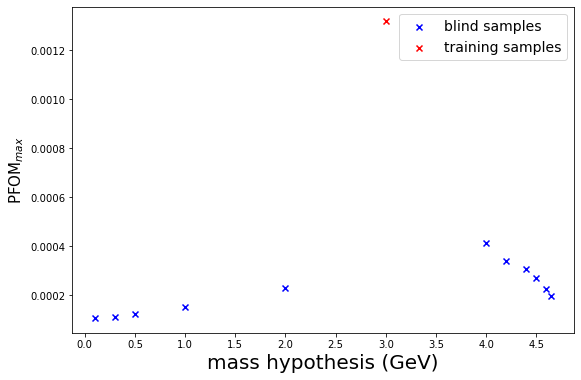

In [5]:
pfom_list = []
names = []
maximum = []
index=[]
clf = XGBClassifier()
clf.load_model(f"/ceph/aavocone/PFOM_models/3_0_500.txt")

for signals in samples:

    df = pq.read_table(f"/ceph/aavocone/Datasets/{signals}")
    df = df.to_pandas()
    names.append(signals[:-13])
    X = df[df.columns[:-1]]    #exclude "signal efficiency [%]" "classification" "B_sig_isSignalAcceptMissingNeutrino"
    y = df["signal"]   
    xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
    xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5)

    yprob = clf.predict_proba(xtest)[:,1]
    sh,bh,s,b,bin_edges = fc.efficiency(yprob,ytest, eff_type=0)
    pfom = fc.PFOM(s,b,bh,5)
    max_index = np.where(pfom==max(pfom))[0][0] #np.where = tuple(array[index_value]), to get index you need to specify location in tuple and in array... 
    max_value = pfom[max_index]
    pfom_list.append(pfom)
    maximum.append(max_value)
    index.append(max_index)
plt.figure(figsize=(9,6))
plt.scatter(values[1:6], maximum[1:6], color="b", marker = "x",label="blind samples")
plt.scatter(values[6],maximum[6],color="r",marker="x",label="training samples")
plt.scatter(values[7:], maximum[7:], color="b", marker = "x")
plt.ylabel("PFOM$_{max}$",fontsize=15)
plt.xlabel("mass hypothesis (GeV)", fontsize = 20)
plt.xticks(np.arange(0,4.7,0.5))
plt.legend(fontsize=14)
plt.savefig(f"/work/aavocone/week14/pfom/pfom_max_3.pdf", format="pdf",bbox_inches="tight")
plt.show()